# Visualization of CAR map
Results calculated in R
Visualizing in Python
## Model 3

In [1]:
%matplotlib inline
import sys
sys.path.append('/apps')
import django
django.setup()
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
## Use the ggplot style
plt.style.use('ggplot')
import shapely.wkt as wkt
import geopandas as gpd
import utilities.data_extraction as de

In [2]:
#file = '/outputs/presence_only_models/predictors/dataset100x100-puebla-p9/0-pred.csv'
#PDF = read.csv(file)
## REad adjancency matrix
mat_filename = "/outputs/training_data_sample_puebla_p9_abies_pinophyta_adjmat.npy"
## Read the data
TDF = pd.read_csv("/outputs/training_data_sample_puebla_p9_abies_pinophyta.csv")
## Geometry file
geometryfile = "/outputs/training_data_sample_puebla_p9_geometry.json"
## Order it according to the id of the cell
## This is important because the adjancy matrix rows need to be the same
TDF.sort_values(by='cell_ids',inplace=True)
nTDF = de.toGeoDataFrame(TDF,xcoord_name='Longitude',ycoord_name='Latitude')
    

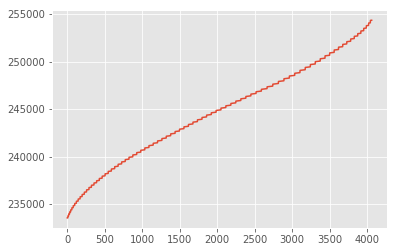

In [3]:
plt.plot(nTDF.cell_ids.values)

## Extract the polygons from cells
### Extract the cells from the Network Database
( No longer necessary)

In [103]:
## Write file in GeoJson
gg.to_file(geometryfile,driver='GeoJSON' )

In [112]:
from mesh.models import initMesh
from django.contrib.gis.geos import Point, Polygon
#coord = -99.76
#coord = 17.55
#xcoord = -98.219
#ycoord = 19.05
xcoord = -97.237
ycoord = 19.482
p = Point(xcoord,ycoord,srid=4326)
radii = np.linspace(0.08,2,10)
polys = map(lambda r : p.buffer(r),radii)
mexmesh = initMesh(11)
## restrict the polygons to the polygon n 3
polys = [polys[9]]
intersected_cells = map(lambda poly : mexmesh.objects.filter(cell__intersects=poly),polys)
# Number of selected cells in each buffer
values = map(lambda l : list(l.values_list('id',flat=True)),intersected_cells)
## Change to network database
from traversals.strategies import idsToCells
cells = map(lambda level : list(idsToCells(level)),values)
ids_poly = map(lambda c : (c.id,wkt.loads(c.polygon.wkt)),cells[0])

gg = gpd.GeoDataFrame(ids_poly,columns=['id','geometry'])
gg.set_geometry('geometry',inplace=True)
gg.set_index('id',inplace=True)
gg['indx'] = gg.index
## Write file in GeoJson
gg.to_file(geometryfile,driver='GeoJSON' )

DEBUG Changed MESH TABLE SPACE
INFO Compiling Query and asking the Graph Database


### Run this to read directly from saved file

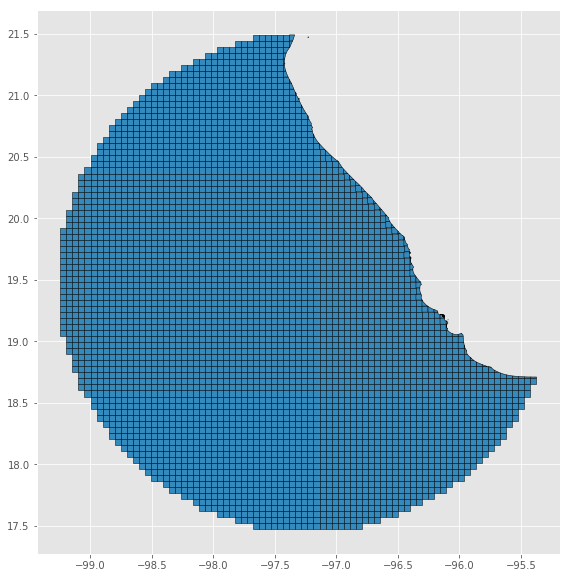

In [4]:

## Readfile
gg = gpd.read_file(geometryfile)
gg.set_index('indx',inplace=True)
plt.rcParams['figure.figsize'] = [10, 10]
gg.plot(edgecolor='black')

### Develop here new pseudo-absences strategies designs
This has been done in R. 
Let's see how we can use it from here

> IMPOSIBLE TO INSTALL new version of Rpy2 due to stupid python 2/7
Continue evading the problem, as the water....

## Plot the fitted values

In [5]:
# Read from csv
from ipywidgets import interact_manual
file_ = '/outputs/presence_only_models/modelCAR_model3_fitted.csv'
fitted_sample = pd.read_csv(file_)
fitted_sample = fitted_sample.drop(fitted_sample.columns[0],axis=1)
fitted_sample.set_index(fitted_sample.columns[0],inplace=True)
fitted_sample.set_index(fitted_sample.index.astype('int'),inplace=True)

In [6]:
## ## Join it with geodataframe
gdf = gg.join(fitted_sample,how='inner')

In [7]:

def plotillo(maxlim,minlim):
    f, ax = plt.subplots(1,figsize=(12,12))
    ax = gdf.plot(column='P',legend=True,cmap=plt.cm.RdYlBu,vmin=minlim,vmax=maxlim,axes = ax)
    nTDF[nTDF.Pinophyta > 0].plot(column='Pinophyta',axes=ax,s=3)
    plt.title("Probability of Presence (Pinophyta) | GMRF")
    plt.show()

In [8]:
interact_manual(plotillo, minlim=(0.0,1.0,0.1),maxlim=(0.0,1.0,0.1),continuous_update=False)

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuNSwgZGVzY3JpcHRpb249dSdtYXhsaW0nLCBtYXg9MS4wKSwgRmxvYXRTbGlkZXIodmFsdWU9MC41LCBkZXNjcmlwdGnigKY=


<function __main__.plotillo>

In [9]:
def plotillo(maxlim,minlim):
    f, ax = plt.subplots(1,figsize=(12,12))
    ax = gdf.plot(column='S',legend=True,cmap=plt.cm.RdYlBu,vmin=minlim,vmax=maxlim,ax=ax)
    nTDF[nTDF.Plantae > 0].plot(column='Plantae',axes=ax,s=3)
    nTDF[nTDF.Pinophyta > 0].plot(column='Pinophyta',axes=ax,s=3,cmap=plt.cm.Wistia)
    plt.title("Probability of Sample Effort (Plants) | GMRF")
    plt.show()
interact_manual(plotillo, minlim=(0.0,1.0,0.1),maxlim=(0.0,1.0,0.1),continuous_update=False)

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuNSwgZGVzY3JpcHRpb249dSdtYXhsaW0nLCBtYXg9MS4wKSwgRmxvYXRTbGlkZXIodmFsdWU9MC41LCBkZXNjcmlwdGnigKY=


<function __main__.plotillo>

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuNSwgZGVzY3JpcHRpb249dSdtYXhsaW0nLCBtYXg9MS4wKSwgRmxvYXRTbGlkZXIodmFsdWU9MC41LCBkZXNjcmlwdGnigKY=


<function __main__.plotillo>

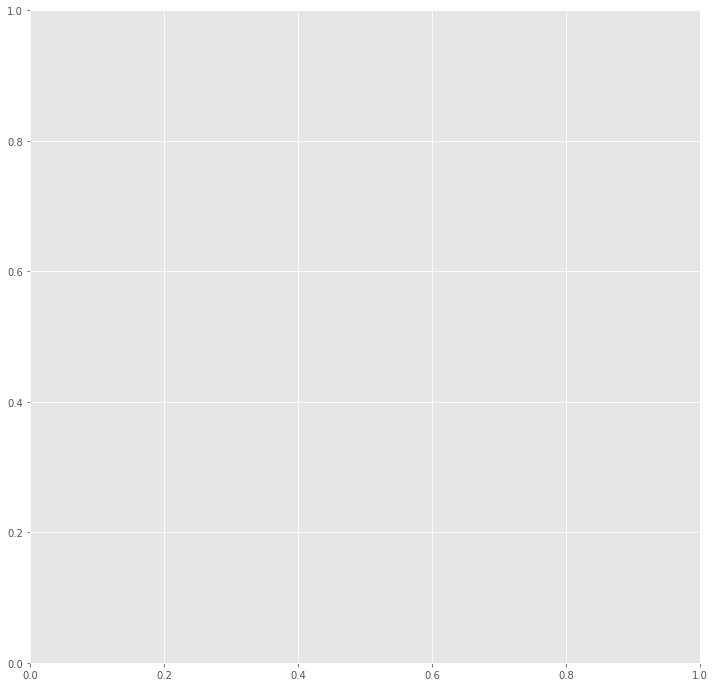

In [10]:
def plotillo(maxlim,minlim):
    f, ax = plt.subplots(1,figsize=(12,12))
    ax = gdf.plot(column='prob_pss',legend=True,cmap=plt.cm.RdYlBu,vmin=minlim,vmax=maxlim,ax=ax)
    nTDF[nTDF.Plantae > 0].plot(column='Plantae',axes=ax,s=3)
    plt.title("Probability of Sample Effort (Plants) | GMRF")
    plt.show()
interact_manual(plotillo, minlim=(0.0,1.0,0.1),maxlim=(0.0,1.0,0.1),continuous_update=False)

Reduce the infinite likelihood,
If infinite repeat the step for sigma2 and tau2
* See the priors , check the priors. modify them
* REmove the nas

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuNSwgZGVzY3JpcHRpb249dSdtYXhsaW0nLCBtYXg9MS4wKSwgRmxvYXRTbGlkZXIodmFsdWU9MC41LCBkZXNjcmlwdGnigKY=


<function __main__.plotillo>

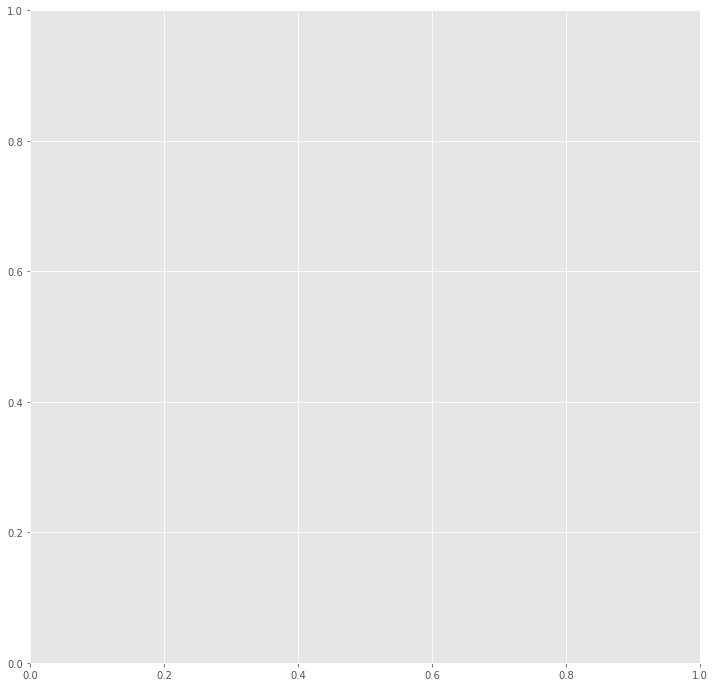

In [11]:
def plotillo(maxlim,minlim):

    f, ax = plt.subplots(1,figsize=(12,12))
    cm = plt.cm.RdYlBu
    ax = gdf.plot(column='prob_pps',legend=True,cmap=cm,vmin=minlim,vmax=maxlim,ax=ax)
    nTDF[nTDF.Pinophyta > 0].plot(column='Pinophyta',axes=ax,s=3)
    plt.title("Probability of Presence (Pinophyta)")
    plt.show()
interact_manual(plotillo, minlim=(0.0,1.0,0.1),maxlim=(0.0,1.0,0.1),continuous_update=False)

## Let's try the Geoviews  thingy


In [12]:
## turn to multipolygons to polygons
geometries = gdf.geometry
polygons = map(lambda g : g.envelope, geometries)
gdf.set_geometry(polygons,inplace=True)



<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
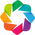

In [13]:
import geoviews as gv
import geoviews.feature as gf
from cartopy import crs
gv.extension('bokeh','matplotlib')

In [14]:
gdf.crs = {'init' : 'epsg:4326'}

In [16]:
gdf.columns

Index([u'geometry', u'S', u'P'], dtype='object')

In [17]:
tiles = gv.tile_sources.EsriImagery
labels = gv.tile_sources.EsriReference 
gmrf = gv.Polygons(gdf,vdims=[('P','P.Presence'),('S','P.pres')],).opts(
    tools=['hover'],
    width = 1500,
    height = 600,
    alpha = 0.5,
    
    cmap = plt.cm.RdYlBu
)

In [18]:
tiles * gmrf * labels

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]   (P,S)
   .WMTS.II    :WMTS   [Longitude,Latitude]

In [ ]:
3 +2

In [ ]:
## Sample from the posterior
from scipy.stats import bernoulli
y_ = lambda p : bernoulli.rvs(p=p,size=1)
Y = fitted_sample.applymap(y_)

In [ ]:
# Reduce function
def getProb(X,p=0.0,n_sample=100):
    # there is a sample here
    #X = X.sample(n=n_sample,axis=0)
    return(sum(X[X > p]) / sum(X))
    

In [ ]:
SY = Y.sum(axis=1) / Y.shape[1]

In [ ]:
## Calculate prob.
SY = Y.sum(axis=1) / Y.shape[1]
DFSY = pd.DataFrame([fitted_sample.index,SY]).transpose()
DFSY.columns = ['idx','PY']
DFSY.set_index(fitted_sample.index.astype('int'),inplace=True)

In [ ]:
DFSY.shape

In [ ]:
fitted_sample.index

In [ ]:
## Join it with geodataframe
gdf = gg.join(DFSY,how='inner')

In [ ]:
gdf.plot(column='PY',legend=True)

In [ ]:
# Reduce function
def mean(X,p=0.0,n_sample=100):
    # there is a sample here
    X = X.mean()
    return(X)


In [ ]:
## Calculate probs on the fly
import functools as ft


def fullProbFromDF(DF, p=0.0,n_sample=500,showPlot=True):
    f = ft.partial(getProb,p=p,n_sample=n_sample)
    fp = DF.apply(f,axis=1)
    fp = pd.DataFrame(fp,columns=['p'] )
    return(fp)

In [ ]:
#new = gg.join(fp,how='inner')
xx = np.linspace(0,1,100)
things = map(lambda p : fullProbFromDF(fitted_sample,p=p),xx)


In [ ]:
new = pd.concat(things,axis=1)
new.columns = xx
new.set_index(new.columns[0])
##
gdf = gg.join(new,how='inner')


In [ ]:

def plot(df, p):
    # df needs to be a geopandas object
    #fp = pd.concat([ geoDataframe,fp],axis=0 )
    fig, ax = plt.subplots(1, figsize=(12, 12))
    name = df.columns[p]
    ac = df.plot(column=name,cmap=plt.cm.viridis,vmin=0.0,vmax=1.0,legend=True,ax=ax,edgecolor='black')
    fig.suptitle('Joint. Probability of presence more than %s'%name)
    plt.show()
    return(None)

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual,FloatSlider,IntSlider
import ipywidgets as widgets

In [ ]:
_tools_to_show = 'box_zoom,pan,save,hover,reset,tap,wheel_zoom'

fig = figure(title='Phase transition in Gradient ',tools=_tools_to_show)
fig.xaxis.axis_label = 'Probability of presence (p)'
fig.yaxis.axis_label_text_color = 'blue'
fig.yaxis.axis_label = 'Probability of exceeding p'
hover = fig.select(dict(type=HoverTool))
hover.mode = 'vline'
hover.tooltips = [("P","@x"),("Ex/entr","@y")]
fig.line(x=data.columns,y=np.gradient(means),line_width=4,color='blue')
#fig.y_range = Range1d(0,1) 
#fig.extra_y_ranges = {"entropy":Range1d(start=0,end=9)}
#fig.add_layout(LinearAxis(y_range_name="entropy",axis_label='Entropy',axis_label_text_color='orange'),'right')

fig.line(x=data.columns,y=np.gradient(entropy),line_width=4,color='orange')#,y_range_name="entropy")

In [ ]:

show(fig)

In [200]:
for i in range(100):
    if (i % 3 == 0) and (i % 5 == 0):
        print("FizzBuzz")
    elif i% 3 == 0:
        print("Fizz")
    elif i % 5 == 0:
        print("Buzz")
    else:
        print(i)

FizzBuzz
1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz
16
17
Fizz
19
Buzz
Fizz
22
23
Fizz
Buzz
26
Fizz
28
29
FizzBuzz
31
32
Fizz
34
Buzz
Fizz
37
38
Fizz
Buzz
41
Fizz
43
44
FizzBuzz
46
47
Fizz
49
Buzz
Fizz
52
53
Fizz
Buzz
56
Fizz
58
59
FizzBuzz
61
62
Fizz
64
Buzz
Fizz
67
68
Fizz
Buzz
71
Fizz
73
74
FizzBuzz
76
77
Fizz
79
Buzz
Fizz
82
83
Fizz
Buzz
86
Fizz
88
89
FizzBuzz
91
92
Fizz
94
Buzz
Fizz
97
98
Fizz
